from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

columns_list = ['income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co-applicant_credit_score_type', 'loan_amount', 'loan_purpose', 'loan_to_value_ratio', 'loan_term', 'preapproval', 'lien_status', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'property_value', 'construction_method', 'occupancy_type', 'county_code', 'census_tract', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex','applicant_age', 'action_taken']

#columns_list = ['loan_purpose', 'loan_amount', 'action_taken', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex', 'lien_status',


#  'income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co-applicant_credit_score_type', 'loan_amount', 'loan_type', 'loan_purpose', 'loan_to_value_ratio', 'interest_rate', 'rate_spread', 'loan_term', 'preapproval', 'lien_status', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'property_value', 'construction_method', 'occupancy_type', 'county_code', 'census_tract', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex', 'action_taken']


int_types = ['applicant_ethnicity-1',
       'applicant_ethnicity-2', 'applicant_ethnicity-3',
       'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1',
       'applicant_race-2', 'applicant_race-3', 'applicant_race-4',
       'applicant_race-5', 'applicant_sex', 'action_taken']
float_types=['loan_amount','loan_to_value_ratio', 'interest_rate', 'rate_spread', 'income', 'debt_to_income_ratio', 'loan_to_value_ratio']

object_types=[]

data = pd.read_csv("state_CA.csv", usecols= columns_list)



<ipython-input-2-9cb36043a649>:21: DtypeWarning: Columns (22,31,32,33,38,46,77) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/state_CA.csv", usecols= columns_list)


In [ ]:
len(columns_list)

33

In [ ]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'loan_term', 'prepayment_penalty_term', 'intro_rate_period',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'occupancy_type', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity-1',
       'applicant_ethnicity-2', 'applicant_ethnicity-3',
       'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1',
       'applicant_race-2', 'applicant_race-3', 'applicant_race-4',
       'applicant_race-5', 'applicant_sex', 'applicant_age'],
      dtype='object')

In [ ]:
columns_to_check_for_na = ['county_code', 'census_tract', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio', 'loan_term', 'prepayment_penalty_term',
       'intro_rate_period', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'property_value', 'construction_method',
       'occupancy_type', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'co-applicant_credit_score_type',
       'applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']

data= data.dropna(subset=columns_to_check_for_na)


In [ ]:
data = data[data!= 'Exempt']
data = data[data!= '1111']
data = data[data!= 1111]
data = data[data!= '8888']
data = data[data!= 8888]

In [ ]:
data = data[data!= 'NaN']
data = data[data!= 'nan']

In [ ]:
# Update action_taken values
data['action_taken'] = data['action_taken'].replace({1: 1, 2: 1, 3: 0, 7: 0})

# Drop rows with action_taken values of 4, 5, 6, or 8
data = data[~data['action_taken'].isin([4, 5, 6, 8])]
data = data[~data['applicant_ethnicity-1'].isin([3, 4])]
data = data[~data['applicant_sex'].isin([3, 4, 6])]



In [ ]:
action_taken_counts = data['action_taken'].value_counts()
print(action_taken_counts)

action_taken
0    32992
1    31881
Name: count, dtype: int64


In [ ]:
data['debt_to_income_ratio']= data['debt_to_income_ratio'].replace({
    '<20%': '0',
    '>60%': '60',

    '30%-<36%': '30',
    '20%-<30%': '20',
    '50%-60%': '50'
})

num_elements_per_range = min(data['debt_to_income_ratio'].value_counts())



In [ ]:

replacement_ranges = {
    '37': [37,38,39,40,41,42],
    '43': [43,44,45,46,47,48,49],
}

for key,value in replacement_ranges.items():
  selected_rows= data['debt_to_income_ratio'].astype(float).between(min(value), max(value))
  data.loc[selected_rows, 'debt_to_income_ratio'] = key



In [ ]:
for i in range(1, 6):
        race_col = f'applicant_race-{i}'
        data[race_col] = data[race_col].replace({1: 1, 2: 2, 21:2, 22:2, 23:2, 24:2, 25:2, 26:2, 27:2, 3: 3, 4: 4, 41:4, 42: 4, 43: 4, 44: 4})

for i in range(1, 6):
        race_col = f'applicant_ethnicity-{i}'
        data[race_col] = data[race_col].replace({1: 1, 2: 0, 11:1, 12:1, 13:1, 14:1})

data['applicant_ethnicity'] = (data[['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5']].sum(axis=1) >= 1).astype(int) + 1
data.drop(['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5'],  axis=1, inplace=True)


In [ ]:
data

,county_code,census_tract,action_taken,preapproval,loan_purpose,lien_status,loan_amount,loan_to_value_ratio,loan_term,prepayment_penalty_term,...,applicant_credit_score_type,co-applicant_credit_score_type,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,applicant_sex,applicant_age,applicant_ethnicity
54108,6085.0,6.085504e+09,1,2,1,1,1085000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,35-44,1
54116,6059.0,6.059063e+09,1,2,1,1,1955000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,35-44,1
54131,6037.0,6.037262e+09,1,2,1,1,3045000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,NaN,1
54139,6059.0,6.059063e+09,1,2,1,1,2625000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,NaN,1
64997,6085.0,6.085508e+09,1,2,1,1,1725000.0,65.0,360.0,18.0,...,9.0,10.0,2.0,NaN,NaN,NaN,NaN,1,45-54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547658,6071.0,6.071002e+09,1,2,1,1,395000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,25-34,1
1547660,6059.0,6.059052e+09,1,2,1,1,1025000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2,25-34,1
1547661,6037.0,6.037403e+09,1,2,1,1,545000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,25-34,1
1547662,6037.0,6.037431e+09,1,2,32,1,875000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2,45-54,1


In [ ]:
def combine_race(row):
    races = []
    for i in range(1, 6):
        race_col = f'applicant_race-{i}'
        if pd.notna(row[race_col]) and row[race_col] in [1,2,3,4,5]:
            races.append(row[race_col])
    return races


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

app_race = data.apply(combine_race, axis=1)
mlb = MultiLabelBinarizer()
race_binarized = mlb.fit_transform(app_race)
data=data.drop(columns=['applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5'])

In [ ]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'loan_term', 'prepayment_penalty_term', 'intro_rate_period',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'occupancy_type', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_sex', 'applicant_age',
       'applicant_ethnicity'],
      dtype='object')

In [ ]:
race_binarized

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [ ]:
import numpy as np
race_sums = race_binarized.sum(axis=1)
data['Mixed'] = (race_sums > 1).astype(int)

data = data[race_sums > 0]
race_binarized = race_binarized[race_sums > 0]

In [ ]:
for i, race in enumerate(['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White']):
    data[f'{race}'] = race_binarized[:, i]

In [ ]:
data['race'] = np.where(np.any(race_binarized[:,:4], axis=1),1,0)
race_columns = ['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White']
result_a =data[race_columns].sum(axis=1)<1
off_rows = data[result_a]
print(off_rows)

Empty DataFrame
Columns: [county_code, census_tract, action_taken, preapproval, loan_purpose, lien_status, loan_amount, loan_to_value_ratio, loan_term, prepayment_penalty_term, intro_rate_period, negative_amortization, interest_only_payment, balloon_payment, property_value, construction_method, occupancy_type, income, debt_to_income_ratio, applicant_credit_score_type, co-applicant_credit_score_type, applicant_sex, applicant_age, applicant_ethnicity, Mixed, AI or AN, Asian, Black or AA, NH or PI, White, race]
Index: []

[0 rows x 31 columns]


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['prepayment_penalty_term'] = data['prepayment_penalty_term'].astype(int)
data['intro_rate_period'] = data['intro_rate_period'].astype(int)

In [ ]:
x = 0
for column in data.columns:
  distinct_values = data[column].nunique()
  print(f"Column '{column}' has {distinct_values} distinct values", x)
  x+=1

Column 'county_code' has 57 distinct values 0
Column 'census_tract' has 8063 distinct values 1
Column 'action_taken' has 2 distinct values 2
Column 'preapproval' has 2 distinct values 3
Column 'loan_purpose' has 6 distinct values 4
Column 'lien_status' has 2 distinct values 5
Column 'loan_amount' has 186 distinct values 6
Column 'loan_to_value_ratio' has 26126 distinct values 7
Column 'loan_term' has 13 distinct values 8
Column 'prepayment_penalty_term' has 7 distinct values 9
Column 'intro_rate_period' has 9 distinct values 10
Column 'negative_amortization' has 2 distinct values 11
Column 'interest_only_payment' has 2 distinct values 12
Column 'balloon_payment' has 2 distinct values 13
Column 'property_value' has 1058 distinct values 14
Column 'construction_method' has 2 distinct values 15
Column 'occupancy_type' has 3 distinct values 16
Column 'income' has 1343 distinct values 17
Column 'debt_to_income_ratio' has 8 distinct values 18
Column 'applicant_credit_score_type' has 8 distinc

In [ ]:
import numpy as np
categorical_features = []
dicts = {}
x = 0
for column in data.columns:
  feature_dict= {}
  distinct_values = data[column].nunique()
  if column == 'action_taken' or column == 'Asian' or column == 'Black or AA' or column == 'NH or PI' or column == 'White':
    continue
  if column == 'AI or AN':
    feature_dict['AI or AN'] = x
    x+=1
    feature_dict['Asian'] = x
    x+=1
    feature_dict['Black or AA'] = x
    x+=1
    feature_dict['NH or PI'] = x
    x+=1
    feature_dict['White'] = x
    x+=1
    dicts['race'] = feature_dict
    continue
  elif distinct_values < 50 and distinct_values>2:
    categorical_features.append(column)
    distinct_ops = data[column].unique()
    for y in distinct_ops:
      feature_dict[y] = x
      x+=1
  elif distinct_values == 2:
    feature_dict['binary'] = x
    x+=1
  else:
    feature_dict['continuous'] = x
    x += 1
  dicts[column]=feature_dict

In [ ]:
print(dicts)

{'county_code': {'continuous': 0}, 'census_tract': {'continuous': 1}, 'preapproval': {'binary': 2}, 'loan_purpose': {1: 3, 31: 4, 2: 5, 32: 6, 4: 7, 5: 8}, 'lien_status': {'binary': 9}, 'loan_amount': {'continuous': 10}, 'loan_to_value_ratio': {'continuous': 11}, 'loan_term': {360.0: 12, 240.0: 13, '360': 14, '240': 15, '300': 16, '180': 17, 180.0: 18, 300.0: 19, '60': 20, '120': 21, '480': 22, '84': 23, '420': 24}, 'prepayment_penalty_term': {18: 25, 36: 26, 0: 27, 24: 28, 12: 29, 6: 30, 2: 31}, 'intro_rate_period': {60: 32, 1: 33, 84: 34, 299: 35, 120: 36, 3: 37, 12: 38, 6: 39, 9: 40}, 'negative_amortization': {'binary': 41}, 'interest_only_payment': {'binary': 42}, 'balloon_payment': {'binary': 43}, 'property_value': {'continuous': 44}, 'construction_method': {'binary': 45}, 'occupancy_type': {3: 46, 1: 47, 2: 48}, 'income': {'continuous': 49}, 'debt_to_income_ratio': {'50': 50, '30': 51, '37': 52, '43': 53, '60': 54, '20': 55, '0': 56, '36': 57}, 'applicant_credit_score_type': {9.0

In [ ]:
# = ['occupancy_type', 'preapproval','lien_status', 'balloon_payment', 'negative_amortization', 'interest_only_payment', 'debt_to_income_ratio','applicant_age', 'loan_purpose', 'applicant_credit_score_type', 'co-applicant_credit_score_type']

data_encoded = pd.get_dummies(data, columns=categorical_features)

In [ ]:
data = data_encoded

In [ ]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'income', 'applicant_sex',
       'applicant_ethnicity', 'Mixed', 'AI or AN', 'Asian', 'Black or AA',
       'NH or PI', 'White', 'race', 'loan_purpose_1', 'loan_purpose_2',
       'loan_purpose_4', 'loan_purpose_5', 'loan_purpose_31',
       'loan_purpose_32', 'loan_term_180.0', 'loan_term_240.0',
       'loan_term_300.0', 'loan_term_360.0', 'loan_term_120', 'loan_term_180',
       'loan_term_240', 'loan_term_300', 'loan_term_360', 'loan_term_420',
       'loan_term_480', 'loan_term_60', 'loan_term_84',
       'prepayment_penalty_term_0', 'prepayment_penalty_term_2',
       'prepayment_penalty_term_6', 'prepayment_penalty_term_12',
       'prepayment_penalty_term_18', 'prepayment_penalty_term_24',
       'prepayment_penalty_term_36', 'i

In [ ]:

# Separate the majority and minority classes
df_majority = data[data.action_taken == 0]
df_minority = data[data.action_taken == 1]

# Undersample the majority class without replacement
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

# Shuffle the dataset to prevent the model from learning any order
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
 data = df_undersampled

In [ ]:
action_taken_counts = data['action_taken'].value_counts()
print(action_taken_counts)

action_taken
1    26720
0    26720
Name: count, dtype: int64


In [ ]:
!pip install holisticai[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 30.7 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=4dd78cacc929298ce0012d9c9867e095e2ff31aec82729a1982bbad4b536e3c6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#DATA ANALYSIS FOR EQUALIZED ODDS
from holisticai.datasets import load_dataset
from holisticai.bias.plots import group_pie_plot

<Axes: >

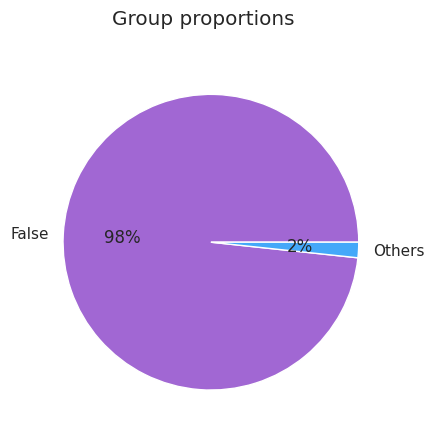

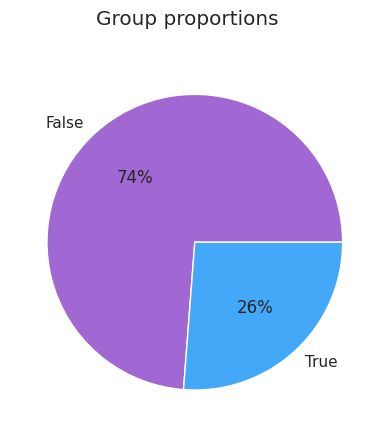

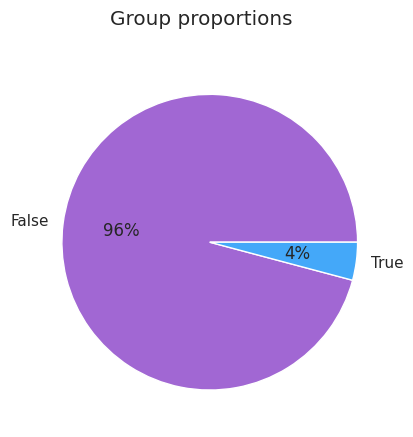

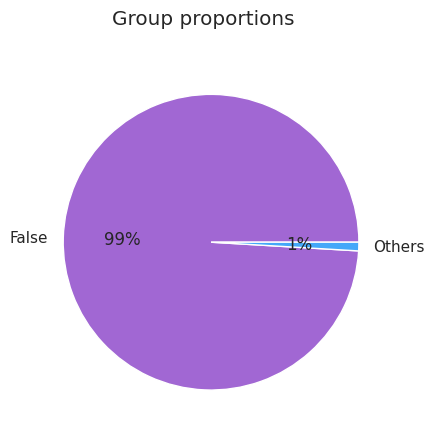

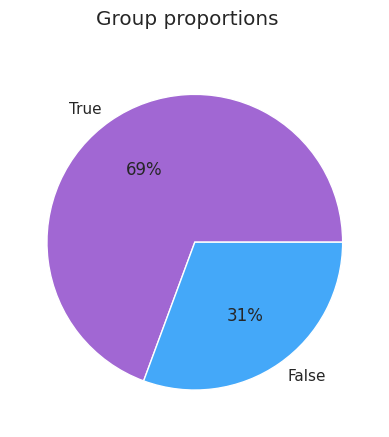

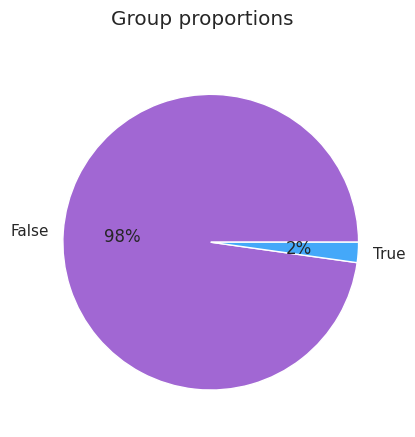

In [ ]:
group_ai_an = data['AI or AN'].astype(bool)
group_asian = data['Asian'].astype(bool)
group_black_aa = data['Black or AA'].astype(bool)
group_nh_pi = data['NH or PI'].astype(bool)
group_white = data['White'].astype(bool)
group_mixed = data['Mixed'].astype(bool)

group_pie_plot(group_ai_an)
group_pie_plot(group_asian)
group_pie_plot(group_black_aa)
group_pie_plot(group_nh_pi)
group_pie_plot(group_white)
group_pie_plot(group_mixed)

In [ ]:
def group_success_rate(g, y):
  success_rate = y[g == 1].sum() / g.sum()  # success rate group_a
  return success_rate

In [ ]:
def statistical_parity_multigroup(group_labels, y_pred):
    success_rates = {}
    for i, group in enumerate(group_labels):

        success_rates[race_cols[i]] = group_success_rate(group, y_pred)

    return success_rates

In [ ]:
from sklearn.metrics import confusion_matrix
def tpr_multigroup(group_labels, y_pred, y_test, X_test):
    tpr_dict = {}

    for group in group_labels:
        X_test = X_test.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        filtered_indices = X_test[X_test[group]==1].index
        group_y_test = y_test[filtered_indices]
        group_y_pred = y_pred[filtered_indices]

        cm = confusion_matrix(group_y_test, group_y_pred, labels=[1, 0])

        if cm.shape == (2, 2):
            TP = cm[0, 0]
            FN = cm[1, 0]
            tpr = TP / (TP + FN) if (TP + FN) > 0 else 0
            tpr_dict[group] = tpr
        else:
            tpr_dict[group] = 0

    return tpr_dict

def fpr_multigroup(group_labels, y_pred, y_test, X_test):
    fpr_dict = {}

    for group in group_labels:
        X_test = X_test.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        filtered_indices = X_test[X_test[group]==1].index
        group_y_test = y_test[filtered_indices]
        group_y_pred = y_pred[filtered_indices]

        cm = confusion_matrix(group_y_test, group_y_pred, labels=[1, 0])
        if cm.shape == (2, 2):
            FP = cm[0, 1]
            TN = cm[0, 0]
            fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
            fpr_dict[group] = fpr
        else:
            fpr_dict[group] = 0

    return fpr_dict


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'action_taken' is the target variable


columns_with_na = data.columns[data.isna().any()].tolist()
X = data.drop(['action_taken','race'], axis=1)
y = data['action_taken']
bin_cols = data['race']

# Split data into training and testing sets
X_train, X_test, y_train, y_test, group_ai_an_tr, group_ai_an_ts, group_asian_tr, group_asian_ts, group_black_aa_tr, \
group_black_aa_ts, group_nh_pi_tr, group_nh_pi_ts, group_white_tr, group_white_ts, group_mixed_tr, group_mixed_ts,  bin_cols_train, bin_cols_test = \
train_test_split(X, y, group_ai_an, group_asian, group_black_aa, group_nh_pi, group_white, group_mixed, bin_cols, test_size=0.2, random_state=42)

train_data = X_train, y_train
test_data  = X_test, y_test

In [ ]:
X_train.columns

Index(['county_code', 'census_tract', 'preapproval', 'lien_status',
       'loan_amount', 'loan_to_value_ratio', 'negative_amortization',
       'interest_only_payment', 'balloon_payment', 'property_value',
       'construction_method', 'income', 'applicant_sex', 'applicant_ethnicity',
       'Mixed', 'AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White',
       'loan_purpose_1', 'loan_purpose_2', 'loan_purpose_4', 'loan_purpose_5',
       'loan_purpose_31', 'loan_purpose_32', 'loan_term_180.0',
       'loan_term_240.0', 'loan_term_300.0', 'loan_term_360.0',
       'loan_term_120', 'loan_term_180', 'loan_term_240', 'loan_term_300',
       'loan_term_360', 'loan_term_420', 'loan_term_480', 'loan_term_60',
       'loan_term_84', 'prepayment_penalty_term_0',
       'prepayment_penalty_term_2', 'prepayment_penalty_term_6',
       'prepayment_penalty_term_12', 'prepayment_penalty_term_18',
       'prepayment_penalty_term_24', 'prepayment_penalty_term_36',
       'intro_rate_period_1', 'in

In [ ]:
group_ts = [group_ai_an_ts, group_asian_ts, group_black_aa_ts, group_nh_pi_ts, group_white_ts, group_mixed_ts]
group_tr = [group_ai_an_tr, group_asian_tr, group_black_aa_tr, group_nh_pi_tr, group_white_tr, group_mixed_tr]
race_cols = ['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White', 'Mixed']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score

X_train, y_train = train_data

# Create a pipeline with preprocessing and model
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=3000))

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy
logistic_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {logistic_accuracy:.4f}')

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

Logistic Regression Accuracy: 0.7868


In [ ]:
print(precision_score(y_test, y_pred), f1_score(y_test, y_pred), recall_score(y_test, y_pred))

0.7558716506781343 0.8004203520448375 0.8505490415038154


In [ ]:
import statistics
success_rates = statistical_parity_multigroup(group_ts, y_pred)

print(success_rates)
tpr = tpr_multigroup(race_cols, y_pred, y_test, X_test)
fpr = fpr_multigroup(race_cols, y_pred, y_test, X_test)
print(tpr,"\n", fpr)
sr_values = list(success_rates.values())
sr_values_range = max(sr_values) - min(sr_values)
sr_value_variance = statistics.variance(sr_values)
sr_value_std_dev = statistics.stdev(sr_values)
print(sr_values_range, sr_value_variance, sr_value_std_dev)

tpr_values = list(tpr.values())
tpr_values_range = max(tpr_values) - min(tpr_values)
tpr_value_variance = statistics.variance(tpr_values)
tpr_value_std_dev = statistics.stdev(tpr_values)
print(tpr_values_range, tpr_value_variance, tpr_value_std_dev)

fpr_values = list(fpr.values())
fpr_values_range = max(fpr_values) - min(fpr_values)
fpr_value_variance = statistics.variance(fpr_values)
fpr_value_std_dev = statistics.stdev(fpr_values)
print(fpr_values_range, fpr_value_variance, fpr_value_std_dev)

{'AI or AN': 0.43820224719101125, 'Asian': 0.5494186046511628, 'Black or AA': 0.31277533039647576, 'NH or PI': 0.3958333333333333, 'White': 0.59120761292052, 'Mixed': 0.5336134453781513}
{'AI or AN': 0.782051282051282, 'Asian': 0.7671957671957672, 'Black or AA': 0.6338028169014085, 'NH or PI': 0.7368421052631579, 'White': 0.7576513262298799, 'Mixed': 0.8267716535433071} 
 {'AI or AN': 0.21794871794871795, 'Asian': 0.13882702301410543, 'Black or AA': 0.4827586206896552, 'NH or PI': 0.3, 'White': 0.1362109072111657, 'Mixed': 0.1732283464566929}
0.2784322825240443 0.011255294987336217 0.1060909750513031
0.19296883664189857 0.004189444218286071 0.06472591612550625
0.3465477134784895 0.017694237353657577 0.13301968784227985


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
rf_pred = rf_model.predict(X_test)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

# Generate and print the classification report
rf_report = classification_report(y_test, rf_pred, target_names=['Class 0', 'Class 1'])
print(rf_report)

Random Forest Accuracy: 0.8310254491017964
              precision    recall  f1-score   support

     Class 0       0.86      0.79      0.82      5315
     Class 1       0.81      0.87      0.84      5373

    accuracy                           0.83     10688
   macro avg       0.83      0.83      0.83     10688
weighted avg       0.83      0.83      0.83     10688



In [ ]:
print(precision_score(y_test, rf_pred), f1_score(y_test, rf_pred), recall_score(y_test, rf_pred))

0.809366869037294 0.837852397198779 0.8684161548483157


In [ ]:
success_rates_rf = statistical_parity_multigroup(group_ts, rf_pred)
tpr_rf = tpr_multigroup(race_cols, rf_pred, y_test, X_test)
fpr_rf = fpr_multigroup(race_cols, rf_pred, y_test, X_test)
print(success_rates_rf, tpr_rf, fpr_rf)

sr_values = list(success_rates_rf.values())
sr_values_range = max(sr_values) - min(sr_values)
sr_value_variance = statistics.variance(sr_values)
sr_value_std_dev = statistics.stdev(sr_values)
print(sr_values_range, sr_value_variance, sr_value_std_dev)

tpr_values = list(tpr_rf.values())
tpr_values_range = max(tpr_values) - min(tpr_values)
tpr_value_variance = statistics.variance(tpr_values)
tpr_value_std_dev = statistics.stdev(tpr_values)
print(tpr_values_range, tpr_value_variance, tpr_value_std_dev)

fpr_values = list(fpr_rf.values())
fpr_values_range = max(fpr_values) - min(fpr_values)
fpr_value_variance = statistics.variance(fpr_values)
fpr_value_std_dev = statistics.stdev(fpr_values)
print(fpr_values_range, fpr_value_variance, fpr_value_std_dev)

{'AI or AN': 0.46629213483146065, 'Asian': 0.5134447674418605, 'Black or AA': 0.3876651982378855, 'NH or PI': 0.5, 'White': 0.5603806460260019, 'Mixed': 0.542016806722689} {'AI or AN': 0.7710843373493976, 'Asian': 0.8244869072894551, 'Black or AA': 0.7329545454545454, 'NH or PI': 0.7291666666666666, 'White': 0.8098541018895001, 'Mixed': 0.8294573643410853} {'AI or AN': 0.1794871794871795, 'Asian': 0.13511507052709726, 'Black or AA': 0.25862068965517243, 'NH or PI': 0.125, 'White': 0.12483845955027138, 'Mixed': 0.15748031496062992}
0.17271544778811643 0.003839062586105046 0.06196016935181057
0.10029069767441867 0.00202899718390593 0.0450443912591338
0.13378223010490103 0.0026244812086432773 0.05122969069439398


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with preprocessing and the MLP model
# StandardScaler is used to scale the data for better performance of the MLP
mlp_model = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000,random_state=42, solver='sgd'))
x

# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test data
mlp_pred = mlp_model.predict(X_test)

# Calculate the accuracy
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f'MLP Accuracy: {mlp_accuracy}')

# Generate and print the classification report
mlp_report = classification_report(y_test, mlp_pred, target_names=['Class 0', 'Class 1'])
print(mlp_report)

MLP Accuracy: 0.8164296407185628
              precision    recall  f1-score   support

     Class 0       0.83      0.79      0.81      5315
     Class 1       0.80      0.84      0.82      5373

    accuracy                           0.82     10688
   macro avg       0.82      0.82      0.82     10688
weighted avg       0.82      0.82      0.82     10688



In [ ]:
print(precision_score(y_test, mlp_pred), f1_score(y_test, mlp_pred), recall_score(y_test, mlp_pred))

0.8015915119363395 0.8220892274211098 0.8436627582356225


In [ ]:
success_rates_mlp = statistical_parity_multigroup(group_ts, mlp_pred)
tpr_mlp = tpr_multigroup(race_cols, mlp_pred, y_test, X_test)
fpr_mlp = fpr_multigroup(race_cols, mlp_pred, y_test, X_test)
print(success_rates_mlp, tpr_mlp, fpr_mlp)


sr_values = list(success_rates_mlp.values())
sr_values_range = max(sr_values) - min(sr_values)
sr_value_variance = statistics.variance(sr_values)
sr_value_std_dev = statistics.stdev(sr_values)
print(sr_values_range, sr_value_variance, sr_value_std_dev)

tpr_values = list(tpr_mlp.values())
tpr_values_range = max(tpr_values) - min(tpr_values)
tpr_value_variance = statistics.variance(tpr_values)
tpr_value_std_dev = statistics.stdev(tpr_values)
print(tpr_values_range, tpr_value_variance, tpr_value_std_dev)

fpr_values = list(fpr_mlp.values())
fpr_values_range = max(fpr_values) - min(fpr_values)
fpr_value_variance = statistics.variance(fpr_values)
fpr_value_std_dev = statistics.stdev(fpr_values)
print(fpr_values_range, fpr_value_variance, fpr_value_std_dev)

{'AI or AN': 0.42134831460674155, 'Asian': 0.4941860465116279, 'Black or AA': 0.35462555066079293, 'NH or PI': 0.4166666666666667, 'White': 0.5543492829379439, 'Mixed': 0.46638655462184875} {'AI or AN': 0.8133333333333334, 'Asian': 0.8205882352941176, 'Black or AA': 0.7080745341614907, 'NH or PI': 0.725, 'White': 0.8012572533849129, 'Mixed': 0.8648648648648649} {'AI or AN': 0.21794871794871795, 'Asian': 0.1714922048997773, 'Black or AA': 0.3448275862068966, 'NH or PI': 0.275, 'White': 0.1434479193590075, 'Mixed': 0.2440944881889764}
0.199723732277151 0.004825696562560197 0.06946723373332349
0.15679033070337423 0.0036280894267541612 0.06023362372258672
0.20137966684788908 0.005284317229684917 0.07269330938734951


<Axes: >

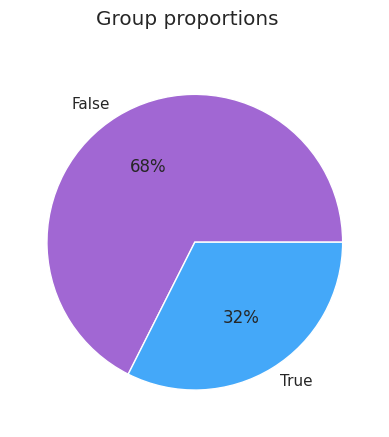

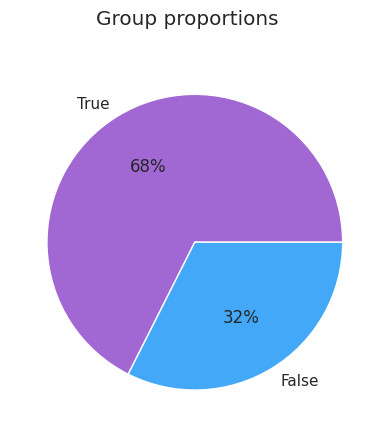

In [ ]:
group_a = data['race'].astype(bool)
group_b = ~data['race'].astype(bool)
group_pie_plot(group_a)
group_pie_plot(group_b)

In [ ]:
from holisticai.bias.metrics import classification_bias_metrics

print(group_a.shape, group_b.shape, y_pred.shape)
df = classification_bias_metrics(
    bin_cols_test.astype(bool),
    ~bin_cols_test.astype(bool),
    y_pred,
    y_test,
    metric_type='both'
)
y_baseline = y_pred.copy()
df_baseline=df.copy()
df_baseline

(53440,) (53440,) (10688,)


,Value,Reference
Metric,,
Statistical Parity,-0.082230,0
Disparate Impact,0.861102,1
Four Fifths Rule,0.861102,1
Cohen D,-0.166396,0
2SD Rule,-8.002247,0
Equality of Opportunity Difference,-0.044832,0
False Positive Rate Difference,-0.064237,0
Average Odds Difference,-0.054535,0
Accuracy Difference,0.005108,0


In [ ]:
df_rf = classification_bias_metrics(
    bin_cols_test.astype(bool),
    ~bin_cols_test.astype(bool),
    rf_pred,
    y_test,
    metric_type='both'
)
rf_baseline = rf_pred.copy()
df_rf_baseline=df_rf.copy()
df_rf_baseline

,Value,Reference
Metric,,
Statistical Parity,-0.068049,0
Disparate Impact,0.878740,1
Four Fifths Rule,0.878740,1
Cohen D,-0.136800,0
2SD Rule,-6.585324,0
Equality of Opportunity Difference,-0.027752,0
False Positive Rate Difference,-0.044428,0
Average Odds Difference,-0.036090,0
Accuracy Difference,0.005759,0


In [ ]:
df_mlp = classification_bias_metrics(
    bin_cols_test.astype(bool),
    ~bin_cols_test.astype(bool),
    mlp_pred,
    y_test,
    metric_type='both'
)
mlp_baseline = mlp_pred.copy()
df_mlp_baseline=df_mlp.copy()
df_mlp_baseline

,Value,Reference
Metric,,
Statistical Parity,-0.088151,0
Disparate Impact,0.841834,1
Four Fifths Rule,0.841834,1
Cohen D,-0.177203,0
2SD Rule,-8.518534,0
Equality of Opportunity Difference,-0.055407,0
False Positive Rate Difference,-0.060204,0
Average Odds Difference,-0.057806,0
Accuracy Difference,0.001445,0


In [ ]:
bin= ['White', 'Non-white']
df = pd.DataFrame({bin[0]: bin_cols_test.astype(bool), bin[1]: ~bin_cols_test.astype(bool)})

In [ ]:
def statistical_parity_multigroup(group_labels, y_pred):
    success_rates = {}
    for i, group in enumerate(group_labels):

        success_rates[bin[i]] = group_success_rate(group, y_pred)

    return success_rates

In [ ]:
success_rates_rf = statistical_parity_multigroup([bin_cols_test.astype(bool),~bin_cols_test.astype(bool)], y_pred)
tpr_rf = tpr_multigroup(bin, y_pred, y_test, df)
fpr_rf = fpr_multigroup(bin, y_pred, y_test, df)
print(success_rates_rf, tpr_rf, fpr_rf)

{'White': 0.5097867367806018, 'Non-white': 0.5920165175498968} {'White': 0.7553008595988538, 'Non-white': 0.7561032318065566} {'White': 0.18085767557489124, 'Non-white': 0.13602550478214664}


In [ ]:
success_rates_rf = statistical_parity_multigroup([bin_cols_test.astype(bool),~bin_cols_test.astype(bool)], rf_pred)
tpr_rf = tpr_multigroup(bin, rf_pred, y_test, df)
fpr_rf = fpr_multigroup(bin, rf_pred, y_test, df)
print(success_rates_rf, tpr_rf, fpr_rf)

{'White': 0.4931346771837569, 'Non-white': 0.5611837577426015} {'White': 0.8092417061611374, 'Non-white': 0.8094186902133922} {'White': 0.15102548166563082, 'Non-white': 0.12327311370882041}


In [ ]:
success_rates_rf = statistical_parity_multigroup([bin_cols_test.astype(bool),~bin_cols_test.astype(bool)], mlp_pred)
tpr_rf = tpr_multigroup(bin, mlp_pred, y_test, df)
fpr_rf = fpr_multigroup(bin, mlp_pred, y_test,df)
print(success_rates_rf, tpr_rf, fpr_rf)

{'White': 0.4691790826760152, 'Non-white': 0.5573296627666896} {'White': 0.8063511830635118, 'Non-white': 0.7997036305260559} {'White': 0.19515226848974518, 'Non-white': 0.13974495217853347}


In [ ]:
# !pip install numba shap

In [ ]:
# import shap

In [ ]:
#Usingg Tree explainer for
# explainer = shap.TreeExplainer(rf_model, feature_perturbation="interventional")
# shap_values = explainer.shap_values(X_test)

In [ ]:
# shap.summary_plot(shap_values, X_test)

In [ ]:
# shap.initjs()
# shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test[0,:], feature_names=feature_names)